# Analisis Data "Default of credit card clients"

Oleh Muzzammil Fadli

## Dataset

Dataset yang digunakan adalah data “default of credit card clients”.

In [1]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd

#Membaca data yang "default of credit card clients.xls"
df = pd.read_excel("data/default of credit card clients.xls")

In [2]:
print("Default Credit Card Clients data -  jumlah baris:",df.shape[0]," jumlah kolom:", df.shape[1])

Default Credit Card Clients data -  jumlah baris: 30000  jumlah kolom: 25


In [3]:
# Data dari lima baris pertama
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Pengecekan data yang hilang

Sebelum melakukan analisis data, dilakukan pengecekan data apakah terdapat missing value (data hilang) atau tidak. Data yang tidak lengkap akan menyebabkan akurasi analisis yang kurang baik.

In [4]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,default payment next month,PAY_6,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,ID
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Berdasarkan pengecekan yang telah dilakukan jelas bahwa data lengkap (tidak ada missing value)

## Eksplorasi Data

In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


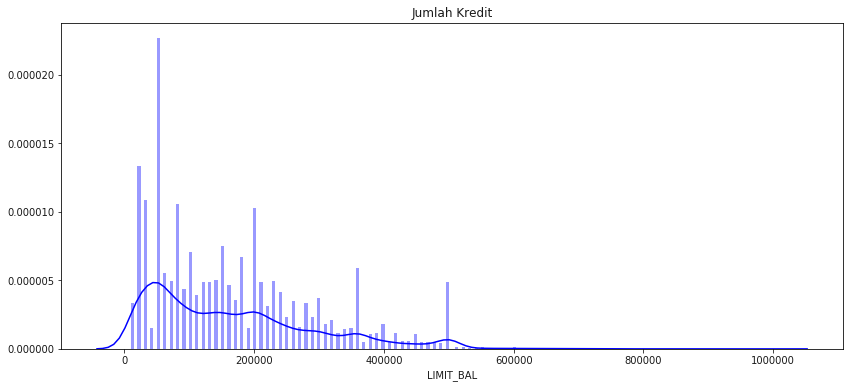

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

plt.figure(figsize = (14,6))
plt.title('Jumlah Kredit')
sns.set_color_codes("pastel")
sns.distplot(df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

Nampak bahwa banyak ID yang memiliki LIMIT_BAL diantara 0-200000.

In [7]:
# Menghitung banyak ID berdasarkan LIMIT_BAL
df['LIMIT_BAL'].value_counts().head(5)

50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: LIMIT_BAL, dtype: int64

Nampak bahwa LIMIT_BAL sebesar 50000 memiliki ID paling banyak dengan 3365 ID. Diikuti LIMIT_BAL 20000, 30000, 80000, dan 200000 dengan masing-masing 1976, 1610, 1567, dan 1528 ID

### Amount of credit limit grouped by default payment next month

Visualisasi jumlah limit kredit (LIMIT_BAL), berdasarkan kategori pada variabel default payment next month.

C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


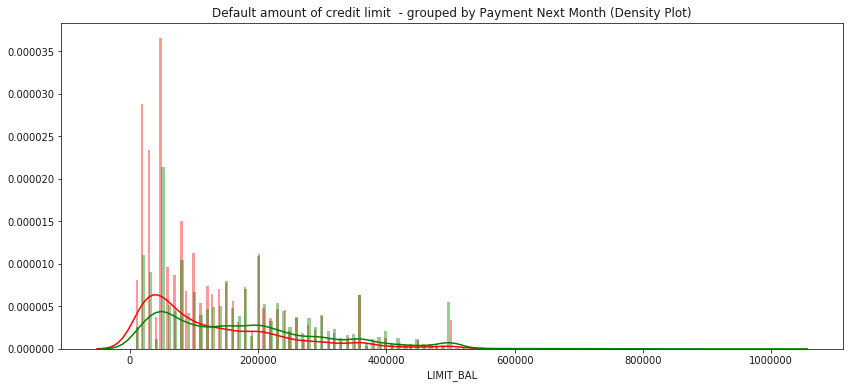

In [8]:
class_0 = df.loc[df['default payment next month'] == 0]["LIMIT_BAL"]
class_1 = df.loc[df['default payment next month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

Warna hijau menunjukkan LIMIT_BAL yang memiliki variabel default payment next month bernilai 0. Warna merah menunjukkan LIMIT_BAL yang memiliki variabel default payment next month bernilai 1.

## Korelasi antar Variabel

Untuk melihat apakah variabel satu mempengaruhi variabel lain perlu dilihat korelasinya.

### korelasi antara variabel-variabel jumlah tagihan per bulan.

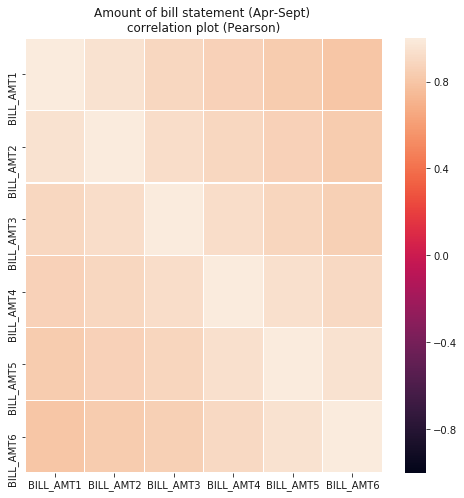

In [9]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

Nampak bahwa korelasi menurun ketika jarak antar bulansemakin tinggi. Korelasi terendah terjadi antara September-April.

### Korelasi jumlah pembayaran sebelumnya pada bulan April - September 2005.

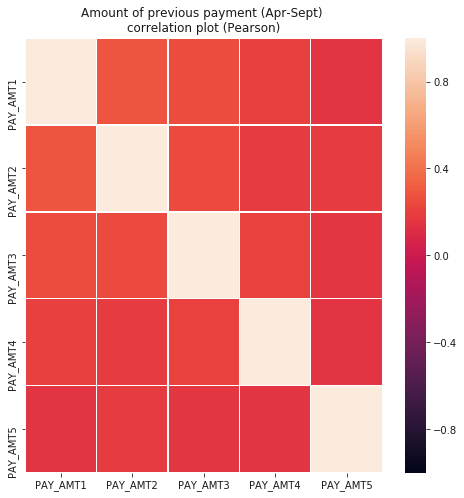

In [10]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (8,8))
plt.title('Amount of previous payment (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

Nampak bahwa tidak ada korelasi antara jumlah pembayaran sebelumnya pada bulan April - September 2005.

### Korelasi antara status pembayaran kembali pada bulan April - September 2005.

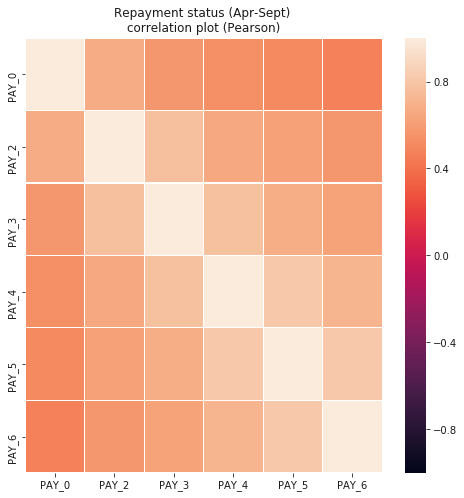

In [11]:
var = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (8,8))
plt.title('Repayment status (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

Nampak bahwa korelasi menurun ketika jarak antar bulansemakin tinggi. Korelasi terendah terjadi antara September-April.

## Analisis Data Menggunakan Random Forest Classifier

In [12]:
import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [13]:
RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier

#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation

RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

### Menentukan variabel prediktor dan variabel target

In [14]:
target = 'default payment next month'
predictors = [  'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

### Split data pada train (data pelatihan) and validation set

In [15]:
train_df, val_df = train_test_split(df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True)

Buat salinan dari train_df dan val_df untuk digunakan nanti.

In [16]:
train_df_bkp = train_df.copy()
val_df_bkp = val_df.copy()

### Klasifikasi Random Forest

Jalankan model menggunakan data pelatihan untuk pelatihan. Kemudian melakukan validasi menggunakan set validasi.

Kriteria validasi GINI yang digunakan adalah GINI = 2 * (AUC) - 1, di mana AUC adalah Karakteristik Operasi Penerima - Area Under Curve (ROC-AUC). Jumlah estimator diatur ke 100 dan jumlah pekerjaan paralel diatur ke 4.

Langkah awal dilakukan inisialisasi RandomForestClassifier.

In [17]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

Latih RandonForestClassifier menggunakan data train_df dan fit function.

In [19]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=2018, verbose=False,
            warm_start=False)

Prediksi nilai target untuk data val_df, menggunakan fungsi prediksi.

In [21]:
preds = clf.predict(val_df[predictors])

### Features importance

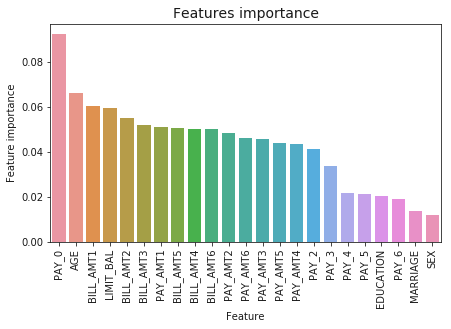

In [23]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

Features/variabel yang paling penting adalah PAY_0, AGE, BILL_AMT1, LIMIT_BAL, BILL_AMT2, BILL_AMT3.

### Confusion matrix

Confusion matrix adalah suatu metode yang biasanya digunakan untuk melakukan perhitungan akurasi pada konsep data mining.

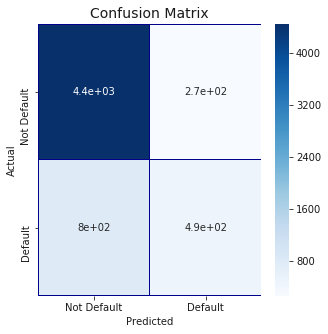

In [24]:
cm = pd.crosstab(val_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [25]:
roc_auc_score(val_df[target].values, preds)

0.6625018741566295

Nilai ROC-AUC yang diperoleh dari RandomForrestClassifier adalah 0.66. Ini mengindikasikan keakuratan prediksi yang cukup. Keakuratan 100% terjadi bila nilai ROC-AUC 1.00.